Alumno: Milton Aldair Martínez Acosta  

Matrícula: 1870354

Estadística Aplicada

Grupo: 051

# Problema 1

## a)

In [2]:
import matplotlib.pyplot as plt, numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA

%matplotlib inline

In [3]:
#fijar el tamaño de las graficas
plt.rcParams['figure.figsize'] = [10, 7.5]

## b)

In [122]:
UNK = pd.read_csv('https://raw.githubusercontent.com/Miltonmtz/Tareas_EstadisticaAplicada_22/master/proceso_desconocido.csv',index_col='tiempo', parse_dates = True)

In [5]:
UNK.head()

,proceso
tiempo,
1,1.404840
2,1.766445
3,1.713471
4,1.489008
5,1.894894


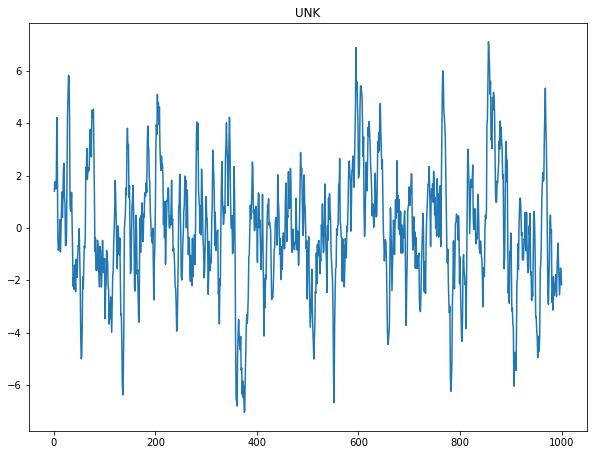

In [123]:
#graficamos
plt.plot(UNK)
plt.title(r'UNK')
plt.show()

Parece un proceso estacionario

## c)

In [125]:
#hacemos la prueba de dickey fuller aumentada ADF
adf = adfuller(UNK)

#presentamos el p-value
print('p-value: %f' % adf[1])


p-value: 0.000000


In [126]:
if adf[1] < 0.05:
    
    print(f'con un un p-value={adf[1]}\n Se rechaza hipótesis nula, serie UNKacionaria') 
    
else:
    
    print(f'con un un p-value = {adf[1]}\n NO se rechaza hipótesis nula, serie no UNKacionaria') 


con un un p-value=1.3566843084345906e-10
 Se rechaza hipótesis nula, serie UNKacionaria


## d)

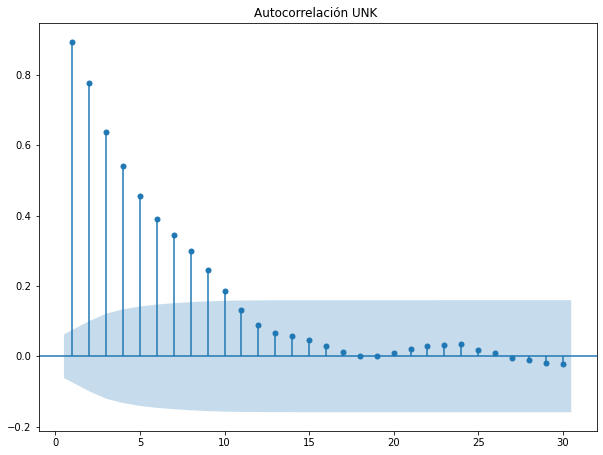

In [127]:
#graficamos función de autocorrelación
plot_acf(UNK, zero=False, lags=30)
plt.title(r'Autocorrelación UNK ')
plt.show()

Observamos que el primer rezago relevante es el 1, lo que nos sugiere un MA(1)

## e)

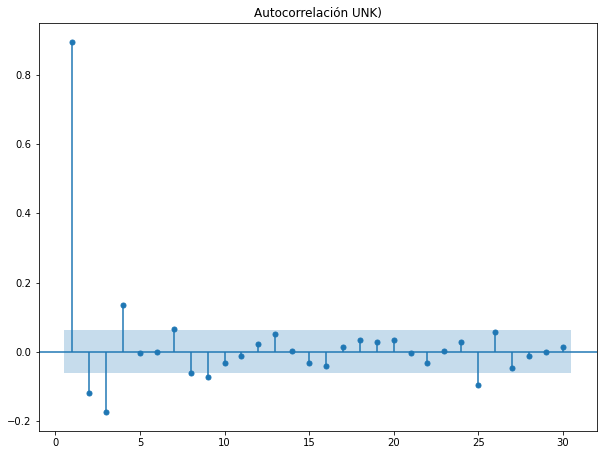

In [128]:
#graficamos función de autocorrelación parcial
plot_pacf(UNK, zero=False, lags=30)
plt.title(r'Autocorrelación UNK)')
plt.show()  

Observamos que el primer rezago relevante es el primero, lo que nos sugiere un AR(1)

## f)

Con base en las graficas ACF Y PACF podemos modelar nuestros datos con un ARMA(1,1)

## g)

### ARMA(1,1)

In [12]:
# estimamos un ARMA (1,1)
modelo11 = ARIMA(UNK, order=(1, 0, 1))
resultado = modelo11.fit()
resultado.summary()

C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                proceso   No. Observations:                 1000
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1461.472
Date:                Sun, 27 Mar 2022   AIC                           2930.944
Time:                        19:59:32   BIC                           2950.575
Sample:                             0   HQIC                          2938.405
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0933      0.293     -0.318      0.750      -0.668       0.481
ar.L1          0.8776      0.017     51.711      0.000       0.844       0.911
ma.L1          0.0911      0.034      2.675      0.007       0.024       0.158
sigma2         1.0870      0.050     21.718      0.000       0.989       1.185
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):                 0.34
Prob(Q):                              0.59   Prob(JB):                         0.85
Heteroskedasticity (H):               1.00   Skew:                            -0.01
Prob(H) (two-sided):                  0.99   Kurtosis:                         2.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### ARMA(1,4)

In [13]:
# estimamos un ARMA (1,4)
modelo14 = ARIMA(UNK, order=(1, 0, 4))
resultado = modelo14.fit()
resultado.summary()

C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                proceso   No. Observations:                 1000
Model:                 ARIMA(1, 0, 4)   Log Likelihood               -1434.029
Date:                Sun, 27 Mar 2022   AIC                           2882.057
Time:                        19:59:33   BIC                           2916.412
Sample:                             0   HQIC                          2895.114
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0955      0.256     -0.373      0.709      -0.597       0.406
ar.L1          0.8263      0.033     24.729      0.000       0.761       0.892
ma.L1          0.1817      0.045      3.995      0.000       0.093       0.271
ma.L2          0.2288      0.049      4.707      0.000       0.134       0.324
ma.L3         -0.0801      0.045     -1.788      0.074      -0.168       0.008
ma.L4          0.0523      0.039      1.340      0.180      -0.024       0.129
sigma2         1.0287      0.048     21.483      0.000       0.935       1.123
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.45
Prob(Q):                              0.99   Prob(JB):                         0.80
Heteroskedasticity (H):               1.01   Skew:                             0.01
Prob(H) (two-sided):                  0.93   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### ARMA(2,2)

In [27]:
# estimamos un ARMA (2,2)
modelo22 = ARIMA(UNK, order=(2, 0, 2))
resultado22 = modelo22.fit()
resultado22.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                proceso   No. Observations:                 1000
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1434.234
Date:                Sun, 27 Mar 2022   AIC                           2880.468
Time:                        20:07:01   BIC                           2909.914
Sample:                             0   HQIC                          2891.660
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0958      0.259     -0.370      0.711      -0.603       0.411
ar.L1          0.4274      0.110      3.901      0.000       0.213       0.642
ar.L2          0.3408      0.100      3.406      0.001       0.145       0.537
ma.L1          0.5802      0.106      5.461      0.000       0.372       0.788
ma.L2          0.2907      0.035      8.417      0.000       0.223       0.358
sigma2         1.0292      0.048     21.657      0.000       0.936       1.122
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.41
Prob(Q):                              0.98   Prob(JB):                         0.81
Heteroskedasticity (H):               1.01   Skew:                             0.01
Prob(H) (two-sided):                  0.94   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### ARMA(3,3)

In [15]:
# estimamos un ARMA (3,3)
modelo33 = ARIMA(UNK, order=(3, 0, 3))
resultado = modelo33.fit()
resultado.summary()

C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\2400GV\anaconda3\lib\site

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                proceso   No. Observations:                 1000
Model:                 ARIMA(3, 0, 3)   Log Likelihood               -1433.576
Date:                Sun, 27 Mar 2022   AIC                           2883.152
Time:                        19:59:36   BIC                           2922.414
Sample:                             0   HQIC                          2898.075
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0973      0.263     -0.370      0.711      -0.613       0.418
ar.L1         -0.2447      0.513     -0.477      0.633      -1.250       0.761
ar.L2          0.5394      0.252      2.144      0.032       0.046       1.032
ar.L3          0.3164      0.171      1.849      0.064      -0.019       0.652
ma.L1          1.2507      0.513      2.437      0.015       0.245       2.257
ma.L2          0.7602      0.290      2.618      0.009       0.191       1.329
ma.L3          0.1826      0.160      1.142      0.253      -0.131       0.496
sigma2         1.0278      0.048     21.615      0.000       0.935       1.121
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.40
Prob(Q):                              0.96   Prob(JB):                         0.82
Heteroskedasticity (H):               1.01   Skew:                             0.01
Prob(H) (two-sided):                  0.95   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### ARMA(4,4)

In [26]:
# estimamos un ARMA (4,4)
modelo44 = ARIMA(UNK, order=(4, 0, 4))
resultado44 = modelo44.fit()
resultado44.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                proceso   No. Observations:                 1000
Model:                 ARIMA(4, 0, 4)   Log Likelihood               -1427.065
Date:                Sun, 27 Mar 2022   AIC                           2874.131
Time:                        20:06:55   BIC                           2923.208
Sample:                             0   HQIC                          2892.784
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0993      0.254     -0.391      0.696      -0.598       0.399
ar.L1          1.4774      0.122     12.133      0.000       1.239       1.716
ar.L2         -0.9466      0.246     -3.849      0.000      -1.429      -0.465
ar.L3         -0.0932      0.236     -0.396      0.692      -0.555       0.369
ar.L4          0.3593      0.102      3.533      0.000       0.160       0.559
ma.L1         -0.4744      0.119     -3.980      0.000      -0.708      -0.241
ma.L2          0.5434      0.133      4.072      0.000       0.282       0.805
ma.L3          0.2951      0.111      2.651      0.008       0.077       0.513
ma.L4          0.2561      0.039      6.558      0.000       0.180       0.333
sigma2         1.0142      0.047     21.552      0.000       0.922       1.106
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.44
Prob(Q):                              0.87   Prob(JB):                         0.80
Heteroskedasticity (H):               1.02   Skew:                             0.02
Prob(H) (two-sided):                  0.87   Kurtosis:                         2.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## h)

In [17]:
ic = {}
for ar in range(5):
    for ma in range(5):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(UNK, order=(ar, 0, ma))
        resultado = modelo.fit()
        ic[(ar, ma)] = [resultado.aic, resultado.bic]

ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])
ic

AR: 0, MA: 0
AR: 0, MA: 1


C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\stat

AR: 0, MA: 2


C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 0, MA: 3


C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 0, MA: 4


C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 1, MA: 0
AR: 1, MA: 1


C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\stat

AR: 1, MA: 2


C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 1, MA: 3


C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 1, MA: 4


C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 2, MA: 0


C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 2, MA: 1


C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


AR: 2, MA: 2


C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 2, MA: 3


C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 2, MA: 4


C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 3, MA: 0


C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 3, MA: 1


C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 3, MA: 2


C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 3, MA: 3


C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 3, MA: 4


C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 4, MA: 0


C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 4, MA: 1


C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 4, MA: 2


C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 4, MA: 3


C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 4, MA: 4


C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\2400GV\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AIC          BIC
AR MA                          
0  0   4554.099799  4563.915309
   1   3776.529813  3791.253079
   2   3254.748875  3274.379896
   3   3099.641698  3124.180475
   4   3005.769303  3035.215835
1  0   2938.589816  2953.313082
   1   2930.944168  2950.575189
   2   2887.641199  2912.179975
   3   2881.833150  2911.279682
   4   2882.057379  2916.411666
2  0   2926.860056  2946.491077
   1   2939.730505  2964.269281
   2   2880.467875  2909.914407
   3   2882.245082  2916.599369
   4   2883.907745  2923.169787
3  0   2898.413337  2922.952113
   1   2887.691717  2917.138249
   2   2882.071937  2916.426224
   3   2883.152269  2922.414311
   4   2886.236630  2930.406427
4  0   2882.286082  2911.732614
   1   2884.280488  2918.634775
   2   2886.282014  2925.544056
   3   2884.797957  2928.967755
   4   2874.130854  2923.208407

In [18]:
ic.sort_values('BIC', ascending = True)

AIC          BIC
AR MA                          
2  2   2880.467875  2909.914407
1  3   2881.833150  2911.279682
4  0   2882.286082  2911.732614
1  2   2887.641199  2912.179975
   4   2882.057379  2916.411666
3  2   2882.071937  2916.426224
2  3   2882.245082  2916.599369
3  1   2887.691717  2917.138249
4  1   2884.280488  2918.634775
3  3   2883.152269  2922.414311
   0   2898.413337  2922.952113
2  4   2883.907745  2923.169787
4  4   2874.130854  2923.208407
   2   2886.282014  2925.544056
   3   2884.797957  2928.967755
3  4   2886.236630  2930.406427
2  0   2926.860056  2946.491077
1  1   2930.944168  2950.575189
   0   2938.589816  2953.313082
2  1   2939.730505  2964.269281
0  4   3005.769303  3035.215835
   3   3099.641698  3124.180475
   2   3254.748875  3274.379896
   1   3776.529813  3791.253079
   0   4554.099799  4563.915309

In [19]:
ic.sort_values('AIC', ascending = True)

AIC          BIC
AR MA                          
4  4   2874.130854  2923.208407
2  2   2880.467875  2909.914407
1  3   2881.833150  2911.279682
   4   2882.057379  2916.411666
3  2   2882.071937  2916.426224
2  3   2882.245082  2916.599369
4  0   2882.286082  2911.732614
3  3   2883.152269  2922.414311
2  4   2883.907745  2923.169787
4  1   2884.280488  2918.634775
   3   2884.797957  2928.967755
3  4   2886.236630  2930.406427
4  2   2886.282014  2925.544056
1  2   2887.641199  2912.179975
3  1   2887.691717  2917.138249
   0   2898.413337  2922.952113
2  0   2926.860056  2946.491077
1  1   2930.944168  2950.575189
   0   2938.589816  2953.313082
2  1   2939.730505  2964.269281
0  4   3005.769303  3035.215835
   3   3099.641698  3124.180475
   2   3254.748875  3274.379896
   1   3776.529813  3791.253079
   0   4554.099799  4563.915309

El AIC me señala un ARMA(4,4) mientras que el BIC sugiere un ARMA(2,2)







## i)

In [71]:
## removeremos la fecha
UNK = UNK.reset_index()

### eliminamos columna fecha
UNK = UNK.drop(['tiempo'], axis=1)

In [80]:
UNK.index = UNK.index + 1

In [81]:
UNK.head()

,proceso,pronostico
1,1.404840,-0.095773
2,1.766445,1.247251
3,1.713471,1.590518
4,1.489008,1.521305
5,1.894894,1.213481


### ARMA (2,2)

In [73]:
UNK22 = UNK

In [82]:
# vamos a estimar la serie con el modelo ARMA (2,2)
UNK22['pronostico'] = resultado22.predict(1,1000)

In [93]:
UNK22.tail()

,proceso,pronostico
996,-2.560993,-2.326430
997,-2.012674,-1.757935
998,-1.539379,-1.148057
999,-1.767746,-1.598368
1000,-2.171853,-2.065819


#### MAPE

In [94]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            print("Hay un 0")
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

In [95]:
MAPE22 = mean_absolute_percentage_error(UNK22['proceso'], UNK22['pronostico'])
MAPE22

65.47580374940387

#### MAD

In [96]:
def deviation(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j])
        else:
            print("Hay un 0")
    return res

def mean_absolute_deviation(y_true, y_pred): 
    return np.mean(np.abs(deviation(np.asarray(y_true), np.asarray(y_pred)))) * 100

In [97]:
MAD22 = mean_absolute_deviation(UNK22['proceso'], UNK22['pronostico'])
MAD22

28.87902019983479

#### MSD

In [107]:
def squared_deviation(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j])**2
        else:
            print("Hay un 0")
    return res

def mean_squared_deviation(y_true, y_pred): 
    return np.mean(np.abs(squared_deviation(np.asarray(y_true), np.asarray(y_pred)))) * 100

In [108]:
MSD22 = mean_squared_deviation(UNK22['proceso'], UNK22['pronostico'])
MSD22

13.195644130734172

### ARMA (4,4)

In [109]:
UNK44 = UNK

In [110]:
# vamos a estimar la serie con el modelo ARMA (2,2)
UNK44['pronostico'] = resultado44.predict(1,1000)

In [111]:
UNK44.tail()

,proceso,pronostico
996,-2.560993,-2.306918
997,-2.012674,-1.706106
998,-1.539379,-1.086378
999,-1.767746,-1.559561
1000,-2.171853,-2.090328


#### MAPE

In [112]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            print("Hay un 0")
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

In [113]:
MAPE44 = mean_absolute_percentage_error(UNK44['proceso'], UNK44['pronostico'])
MAPE44

70.0192065833256

#### MAD

In [114]:
def deviation(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j])
        else:
            print("Hay un 0")
    return res

def mean_absolute_deviation(y_true, y_pred): 
    return np.mean(np.abs(deviation(np.asarray(y_true), np.asarray(y_pred)))) * 100

In [115]:
MAD44 = mean_absolute_deviation(UNK44['proceso'], UNK44['pronostico'])
MAD44

30.9188426000369

#### MSD

In [116]:
def squared_deviation(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j])**2
        else:
            print("Hay un 0")
    return res

def mean_squared_deviation(y_true, y_pred): 
    return np.mean(np.abs(squared_deviation(np.asarray(y_true), np.asarray(y_pred)))) * 100

In [117]:
MSD44 = mean_squared_deviation(UNK44['proceso'], UNK44['pronostico'])
MSD44

15.206088756436293

## j)

In [ ]:
Modelo elegido segun el valor de
MAPE: ARMA(2,2)
MAD: ARMA(2,2)
MSD: ARMA(2,2)

## k)

El modelo elegido es ARMA(2,2) debido a que las tres medias calculados fueron las menores

## i)

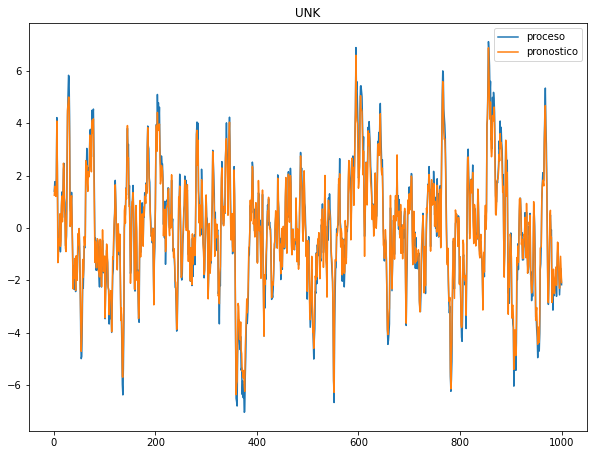

In [130]:
UNK22[['proceso', 'pronostico']].plot()
plt.title('UNK')
plt.show()